In [1]:
import pandas as pd
import pyodbc
import seaborn

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BusCISSQL1601\CIS655;'
                      'Database=AdventureWorks;'
                      'Trusted_Connection=yes;')

In [3]:
sql = """SELECT p.Name AS ProductName, 
	(p.ListPrice - p.StandardCost)/p.ListPrice*100 as ProfitPercentage
FROM AdventureWorks.Production.Product p,
	AdventureWorks.Production.ProductCategory pc,
	AdventureWorks.Production.ProductSubcategory ps
WHERE p.ListPrice <> 0 
	AND p.StandardCost<>0
	AND p.ProductSubcategoryID = ps.ProductSubcategoryID
	AND ps.ProductCategoryID = pc.ProductCategoryID
	AND pc.Name = 'Clothing'
ORDER BY ProfitPercentage"""

df = pd.read_sql(sql, conn)
conn.close()

In [4]:
df.describe()

,ProfitPercentage
count,35.000000
mean,51.074857
std,16.858845
min,23.000000
25%,40.870000
50%,58.740000
75%,62.590000
max,64.240000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

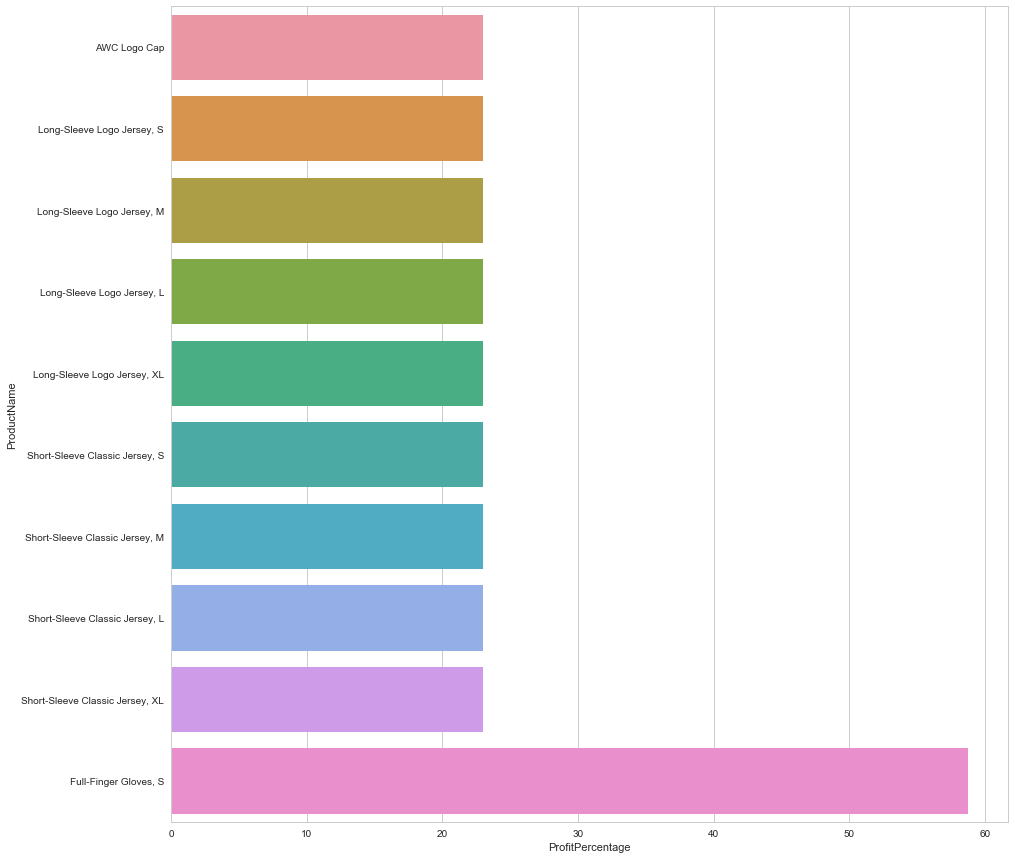

In [7]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x='ProfitPercentage', y='ProductName', data=df[0:10], label="Clothing Product Profit Percentage")